<a href="https://colab.research.google.com/github/wesnasimone/IA901-Processamento_Imagens_Segmentacao/blob/main/Filtros/Ex04_225843.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###########################################

          Nome: Wesna Simone Bulla de Araujo
          RA: 225843
          Curso: EA098/IA901

##########################################



# Ex04 - Filtragem de Imagens

Nesta atividade vamos entender a operação de convolução e o uso da mesma para filtragem de imagens. Testaremos o uso de **filtros suavizantes**, usados para a remoção de ruído, e **filtros aguçantes**, usados para detecção de bordas.  

- **Filtros suavizantes:** são aqueles que removem a nitidez da imagem fazendo uma média, aritmética ou ponderada, na janela do núcleo. O filtro ponderado suavizante mais comum é o da gaussiana. Filtros suavizantes são muito utilizados para eliminar ruído de uma imagem.

- **Filtros aguçantes:** são aqueles que realçam as bordas da imagem. Alguns dos filtros aguçantes comuns são: Filtro de Sobel, Filtro de Prewitt, Filtro Laplaciano.

Veja mais no notebook sobre [Filtragem no domínio espacial](https://github.com/lrittner/Computacao-Visual/blob/master/tutoriais/07_Filtragem_no_dominio_espacial.ipynb)

In [ ]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import skimage.filters as skf
from scipy.ndimage import convolve
import os
from google.colab import drive
drive.mount('/content/gdrive')
path = "gdrive/MyDrive/P_IA901A_2023S1/IA901A_Ex04/"

Mounted at /content/gdrive


float64


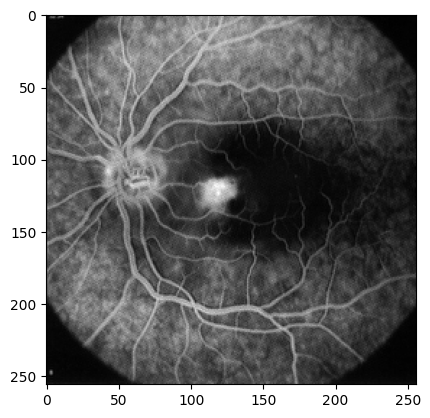

In [ ]:
%matplotlib inline
f = mpimg.imread(path+'retina.tif')
f = np.array(f, dtype='float')
plt.imshow(f,cmap='gray')
print(f.dtype)

**ATENÇÃO** - as operações de filtragem alteram os valores e eles podem sair da faixa de 0 a 255. Portanto, fique atento à maneira como você está realizando as operações e visualizando os resultados. Algumas dicas:

- Uma boa prática é realizar as operações em ponto flutuante;
- Quando a visualização não corresponde ao esperado, desconfie que os valores sairam da escala e que os valores, de alguma maneira, estão sendo truncados;

## Exercício 4.1 - Operação de convolução e filtro da média

Entenda o uso da operação de convolução e experimente usá-la para entender o filtro da média. Siga o seguinte roteiro:
- crie uma imagem numérica pequena (7x7, por exemplo), crie um filtro de média (máscara 3x3) e use a função da biblioteca scipy (scipy.ndimage.convolve) para realizar a filtragem. Você precisará importar a biblioteca usando *from scipy.ndimage import convolve*,mas não é preciso instalar nada. Verifique numericamente que a filtragem esteja correta;
- repita a operação de filtragem com a mesma máscara da média e a de convolução na imagem da retina;
- faça experimentos variando o tamanho da máscara do filtro com a imagem da retina e compare as imagens resultantes;
- varie também o modos da função - '*reflect*', '*constant*', '*nearest*', '*mirror*', '*wrap*'- explicando as diferenças encontradas. Dica, você só conseguirá visualizar as diferenças se aumentar o tamanho da máscara (filtro);

In [ ]:
# Importa biblioteca de convolução
from scipy.ndimage import convolve

# Imagem numérica 7x7 do tipo float
num = np.arange(0.0,49.0,1.0)
num = num.reshape(7,7)

# Filtro de média 3x3 do tipo float
tam = 3
filtro = np.ones((tam,tam))/(tam*tam)

# Filtragem (convolução)
img_filtrada =convolve(num,filtro)

print('Imagem Numérica (img) = \n{}\n'.format(num))
print('Filtro de Média (f) = \n{}\n'.format(filtro))
print('img * f = \n{}'.format(img_filtrada))

Imagem Numérica (img) = 
[[ 0.  1.  2.  3.  4.  5.  6.]
 [ 7.  8.  9. 10. 11. 12. 13.]
 [14. 15. 16. 17. 18. 19. 20.]
 [21. 22. 23. 24. 25. 26. 27.]
 [28. 29. 30. 31. 32. 33. 34.]
 [35. 36. 37. 38. 39. 40. 41.]
 [42. 43. 44. 45. 46. 47. 48.]]

Filtro de Média (f) = 
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]

img * f = 
[[ 2.66666667  3.33333333  4.33333333  5.33333333  6.33333333  7.33333333
   8.        ]
 [ 7.33333333  8.          9.         10.         11.         12.
  12.66666667]
 [14.33333333 15.         16.         17.         18.         19.
  19.66666667]
 [21.33333333 22.         23.         24.         25.         26.
  26.66666667]
 [28.33333333 29.         30.         31.         32.         33.
  33.66666667]
 [35.33333333 36.         37.         38.         39.         40.
  40.66666667]
 [40.         40.66666667 41.66666667 42.66666667 43.66666667 44.66666667
  45.33333333]]


Percebe-se que no geral a convolução foi realizada corretamente, no entanto, o algoritimo arredondou alguns valores (desconsiderando os valores das bordas da matriz), pois por exemplo o valor 9 (posição linha 2 coluna 3) resultaria em 8,99999991. Isso faz sentido, pois o filtro de média é uma dizima periódica e precisaria de uma quantidade de bits infinita para poder armazenar o exato valor.

A seguir foi aplicado o mesmo filtro de média em uma imagem de retina.

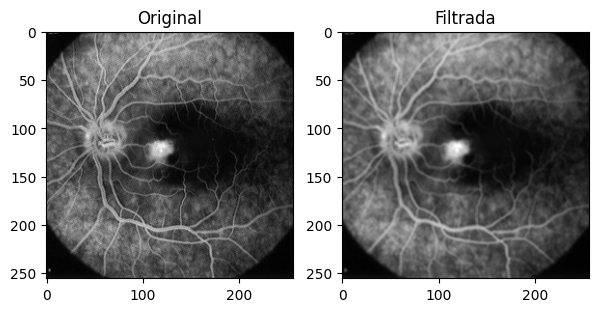

In [ ]:
# Convolução com o filtro de média 3x3
ret_filtrada =convolve(f,filtro)

# Plota a imagem original e a filtrada
lista_imagens = [f, ret_filtrada]
titulos = ['Original', 'Filtrada']
figura = plt.figure(figsize=(7,7))
for c in range(len(lista_imagens)):
  a = figura.add_subplot(1,2,c+1)
  a.title.set_text(titulos[c])
  plt.imshow(lista_imagens[c], cmap='gray')
plt.show()

O resultado da filtragem mostra que de fato ocorreu uma suavização na imagem representado por um leve embaçamento em relação a original. Esse nível de 'embaçamento' pode ser controlado pelo tamanho do filtro, assim quanto maior o filtro maior será a suavização, pois a média será feita com mais vizinhos (pixels ao redor do pixel central coberto pelo filtro) ao passo que a varredura do filtro sobre a imagem irá reduzir (menos pixels centrais modificados e mais efeito de borda). O plote abaixo ilustra a filtragem com diferentes tamanhos de filtro.

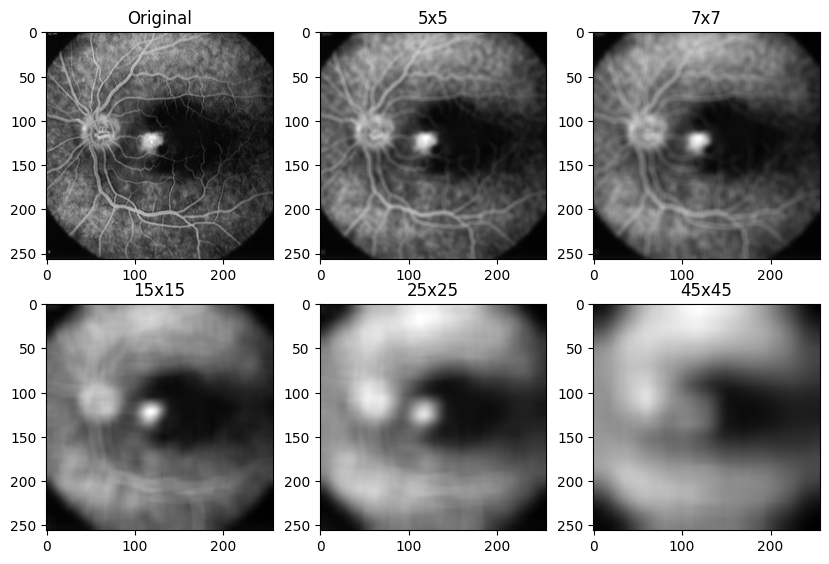

In [ ]:
# Filtros de diferentes tamanhos convoluidos com a imagem da retina
ret_filtrada = []
tam = [5,7,15,25,45]                                          # tamanho dos filtros
for c in range(len(tam)):
  filtro1 = np.ones((tam[c],tam[c]))/(tam[c]*tam[c])          # cria filtro de média para cada tamanho escolhido
  ret_filtrada.append(convolve(f,filtro1))                    # armazena o resultado da filtragem


# Plota a imagem original e as imagens filtradas com diferentes tamanhos de filtro
lista_imagens = [f, ret_filtrada]
titulos = ['Original', '5x5', '7x7', '15x15', '25x25', '45x45']
figura = plt.figure(figsize=(10,10))
for c in range(len(titulos)):
  a = figura.add_subplot(3,3,c+1)
  a.title.set_text(titulos[c])
  if c == 0:
    plt.imshow(f, cmap='gray')
  else:
    plt.imshow(ret_filtrada[c-1], cmap='gray')
plt.show()

De fato, conforme o tamanho do filtro aumenta a suavização também aumenta de modo que a imagem perde detalhes podendo até mesmo ficar irreconhecível.

Sobre os efeitos de borda um filtro de média de tamanho 65 foi escolhido para poder visualizar as diferenças. As imagens abaixo mostram cada um dos efeitos diponíveis.

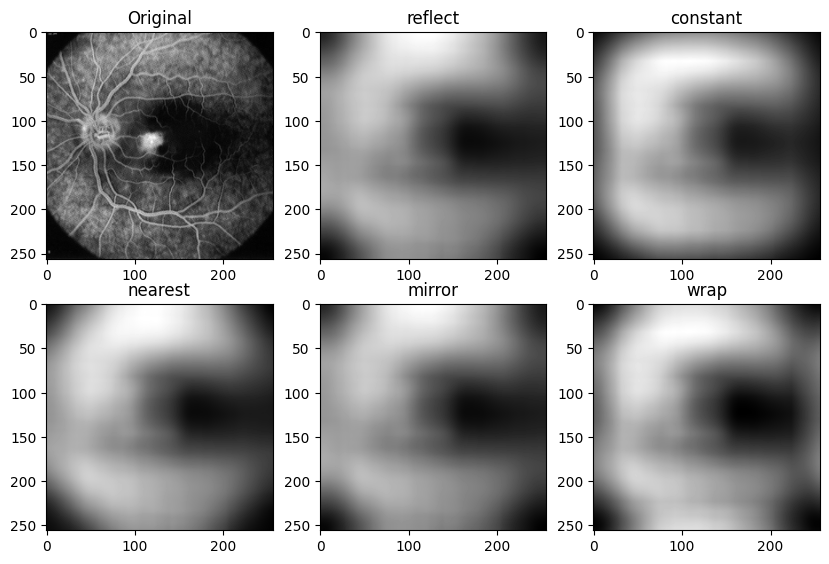

In [ ]:
# Filtro de média 65x65
tam = 65
filtro2 = np.ones((tam,tam))/(tam*tam)

# Calcula a convolução para um filtro 65x65 considerando diferentes efeitos de borda
ret_filtrada = []
bordas = ['reflect', 'constant', 'nearest', 'mirror', 'wrap']
for c in range(len(bordas)):
  ret_filtrada.append(convolve(f,filtro2,mode=bordas[c]))

# Plota a imagem original e as imagens filtradas com diferentes efeitos de borda
lista_imagens = [f, ret_filtrada]
titulos = ['Original', 'reflect', 'constant', 'nearest', 'mirror', 'wrap']
figura = plt.figure(figsize=(10,10))
for c in range(len(titulos)):
  a = figura.add_subplot(3,3,c+1)
  a.title.set_text(titulos[c])
  if c == 0:
    plt.imshow(f, cmap='gray')
  else:
    plt.imshow(ret_filtrada[c-1], cmap='gray')
plt.show()

Para o modo *reflect*, *nearest* e *mirror* visualmente a diferença entre elas está mais sutil. Mas a nível de matriz o que as diferencia é que no modo *reflect* as bordas serão preenchidas com a reflexão de toda a linha do último pixel sobre a borda; no caso do modo *nearest* ele replica o último pixel para completar a borda; Enquanto que o modo *mirror* espelha considerando o centro do último pixel.

Já os modos *constant* e *wrap* é possível verificar melhor a diferença. O modo *constant* aumenta a matriz com valores constantes fornecidos para a função, nesse caso o valor default é zero, e por isso se observarmos a imagem é possível ver um contorno (borda) mais escuro. Por fim, o modo *wrap* preenche as bordas com os valores das bordas opostas. Pela imagem vê-se que existe algumas marcações bem definidas que lembram a ideia de colar imagens iguais uma do lado da outra.

## Exercício 4.2 - Filtro gaussiano e redução de ruído

Explore o filtro Gaussiano. Sugestões:
- teste a propriedade de decomposição das máscaras da convolução, ou seja, crie um filtro gaussiano bi-dimensional (3,3) a partir de 2 filtros unidimensionais (3,1) e (1,3);
- adicione ruído gaussiano à imagem da retina (sugestão: use np.random) e depois tente remover o ruído com o filtro gaussiano. Você pode aumentar o filtro gaussiano se quiser. Comente seu resultado.

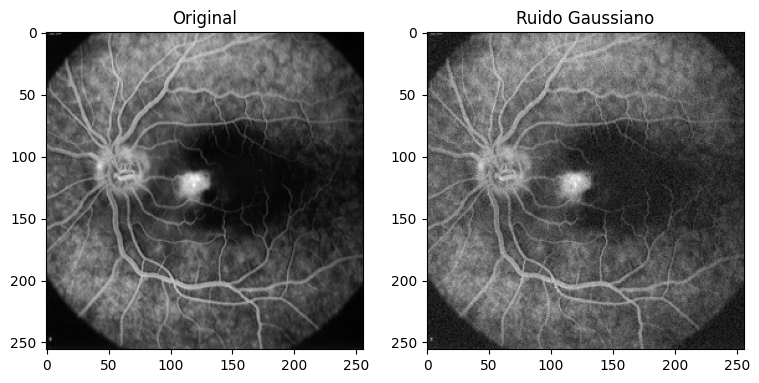

In [ ]:
# Decomposição do filtro gaussiano 3x3
filtro_gaussiano = np.array([[1,2,1],[2,4,2],[1,2,1]])
filtro_gau_vertical = filtro_gaussiano[:,0:1]/4                 # filtro gaussiano vertical (3x1)
filtro_gau_horizontal = filtro_gaussiano[0:1,:]/4               # filtro gaussiano horizontal (1x3)

np.random.seed(1)

ruido=np.random.normal(0, 10,size=(256,256))                    # cria array com valores aleatórios seguindo a distribuição gaussiana do tamanho da imagem para representar
                                                                # o ruído gaussiano
# Acresecenta o ruido gaussiano
f_float = f + ruido

# Plota a imagem original e a imagem com o ruido gaussiano
lista_imagens = [f, f_float]
titulos = ['Original', 'Ruido Gaussiano']
figura = plt.figure(figsize=(9,9))
for c in range(len(titulos)):
  a = figura.add_subplot(1,2,c+1)
  a.title.set_text(titulos[c])
  plt.imshow(lista_imagens[c], cmap='gray')
plt.show()

Foi adicionado a imagem original ruidos do tipo gaussiano. Como observado a imagem ganhou pontos mais claros nas regiões mais escuras. Note também que o valor do desvio padrão da curva que representa a distribuição gaussiana foi definido em 10, de modo a se obter valores maiores para serem somados aos valores inferiores a 10 para que a diferença ficasse mais visível. Em seguida, a imagem ruidosa foi passada pelo filtro gaussiano decomposto, isto é, primeiro a imagem foi convoluida com o filtro horizontal e o resultado dessa convolução convoluida com o filtro vertical.

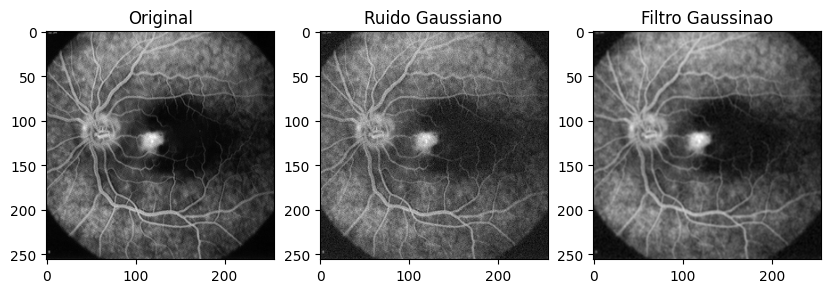

In [ ]:
#Filtragem Gaussiana --> decomposição
conv_vertical = convolve(f_float,filtro_gau_horizontal)       # primeira convolução --> filtro horizontal
filtragem_gau = convolve(conv_vertical,filtro_gau_vertical)   # segunda convolução --> filtro vertical

# Plota a imagem original, a imagem com o ruido gaussiano e o resultado do filtro
lista_imagens = [f, f_float,filtragem_gau]
titulos = ['Original', 'Ruido Gaussiano', 'Filtro Gaussinao']
figura = plt.figure(figsize=(10,10))
for c in range(len(titulos)):
  a = figura.add_subplot(1,3,c+1)
  a.title.set_text(titulos[c])
  plt.imshow(lista_imagens[c], cmap='gray')
plt.show()

Após a filtragem percebe-se que a imagem resultante não é igual a imagem original, mas o filtro gaussiano suavizou os ruidos da imagem (deixou a região que antes era escura novamente escura) embora ele ainda seja perceptível.

## Exercício 4.3 - Filtro de Sobel e detecção de bordas

Existem vários filtros que procuram realçar as bordas da imagem. Um dos mais conhecidos é o Operador Sobel, composto por uma máscara vertical (Sv) e uma máscara horizontal (Sh).

In [ ]:
import numpy as np

Sv = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
print('Sv =\n',Sv)

Sh = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
print('Sh =\n',Sh)

Sv =
 [[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
Sh =
 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


### Exercício 4.3.1 - Visualizando as bordas verticais e horizontais em 2 imagens separadas

Para detectar bordas de uma imagem usando o Filtro de Sobel, precisamos fazer a filtragem da imagem usando tanto a máscara vertical, quanto a horizontal. No final, acabaremos com 2 imagens resultantes, cada uma reforçando as bordas verticais e horizontais, respectivamente.

Experimente filtrar as imagens abaixo com os Filtros de Sobel vertical e horizontal e visualize o resultado. Para cada imagem, você deve obter uma imagem fitrada pelo Filtro de Sobel vertical - **fv** - e uma imagem filtrada pelo Filtro de Sobel horizontal - **fh**.

In [ ]:
img1 = mpimg.imread(path+'retina.tif')
img1 = np.array(img1, dtype='float')

Primeiramente a imagem foi convertida para float para evitar truncamento de valores e para representar valores negativos já que o filtro também possui valores negativos. Em seguida foi realizada a convolução da imagem com cada um dos filtros de Sobel, resultando nas seguintes imagens.

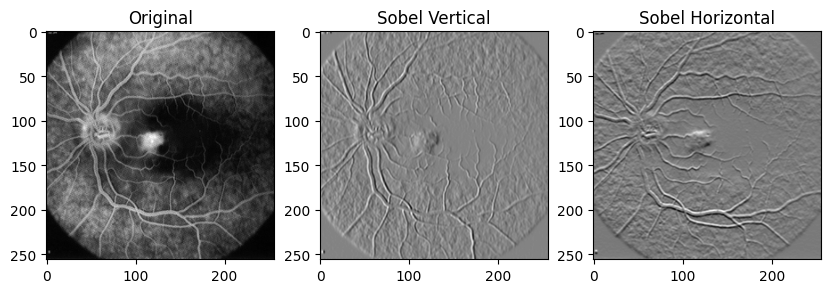

In [ ]:
# Convolução com os filtro de Sobel --> Imagem Retina
sobel_vertical_ret = convolve(img1,Sv)                # convolução com o filtro vertical
sobel_horizontal_ret = convolve(img1,Sh)              # convolução com o filtro horizontal

# Plota a imagem original, a imagem com o filtro vertical e com o horizontal
lista_imagens = [img1, sobel_vertical_ret,sobel_horizontal_ret]
titulos = ['Original', 'Sobel Vertical', 'Sobel Horizontal']
figura = plt.figure(figsize=(10,10))
for c in range(len(titulos)):
  a = figura.add_subplot(1,3,c+1)
  a.title.set_text(titulos[c])
  plt.imshow(lista_imagens[c], cmap='gray')
plt.show()

Através do plote é possível ver a diferença entre os filtros de modo que a imagem convoluida com o filtro vertical da mais ênfase para os contornos verticais enquanto que a mesma imagem convoluida com o filtro horizontal possui as representações horizontais da imagem original. A mesma análise e procedimentos podem ser aplicados em uma segunda imagem.

In [ ]:
img2 = mpimg.imread(path+'cameraman.tif')
img2 = np.array(img2, dtype='float')

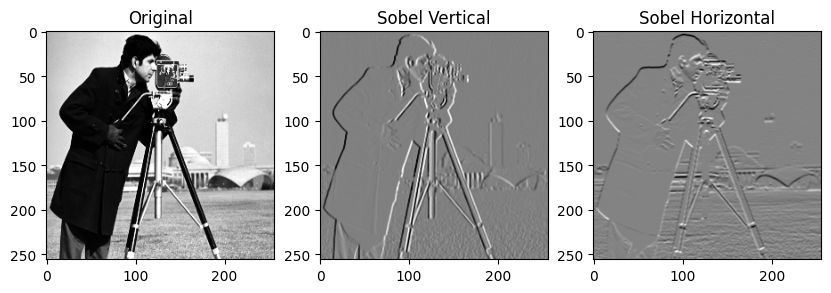

In [ ]:
# Convolução com os filtro de Sobel --> Imagem Camaraman
sobel_vertical_man = convolve(img2,Sv)          # convolução com o filtro vertical
sobel_horizontal_man = convolve(img2,Sh)        # convolução com o filtro horizontal


# Plota a imagem original, a imagem com o filtro vertical e com o horizontal
lista_imagens = [img2, sobel_vertical_man,sobel_horizontal_man]
titulos = ['Original', 'Sobel Vertical', 'Sobel Horizontal']
figura = plt.figure(figsize=(10,10))
for c in range(len(titulos)):
  a = figura.add_subplot(1,3,c+1)
  a.title.set_text(titulos[c])
  plt.imshow(lista_imagens[c], cmap='gray')
plt.show()

Como esperado os contornos puramente verticais foram representados apenas na imagem com o filtro vertical, como é o caso por exemplo do terceiro pé do tripé da câmera e o prédio mais alto ao fundo da imagem. Enquanto que na imagem com o filtro horizontal esses elementos não aparecem tem-se que a lente da câmera e o nariz do fotógrafo são mais aguçados para esse filtro.

Note que que alguns contornos aparecem em ambos os filtros, tanto na imagem da retina quanto na do cameraman. Isso pode estar relacionado com o fato de alguns contornos terem tanto componente horizontal quanto vertical.

### Exercício 4.3.2 - Visualizando todas as bordas em uma única imagem

Para visualizar o resultado das 2 filtragens em uma única imagem, utilizamos a magnitude de Sobel. A função MagSobel a ser implementada possui como parâmetro a imagem de entrada e deve seguir a seguinte equação:

$$MagSobel = \sqrt{f_h^2 + f_v^2}$$

onde $f_h$ é a imagem de entrada convolvida com o operador de Sobel horizontal e $f_v$ é a imagem de entrada convolvida com o operador de Sobel vertical. Crie esta função e visualize a Magnitude Sobel das imagens geradas no item 3.1 (fv e fh).

In [ ]:
# Função para calcular a magnitude de Sobel
# Parâmetro: imagem a ser filtrada
# Return: retorna a magnitude de Sobel, e o resultado parcial de cada filtro (vertical e horizontal)

def magnitude_sobel(img):

  # Filtros de sobel
  Sv = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
  Sh = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

  # Processo de filtragem de sobel
  fv = convolve(img,Sv)
  fh = convolve(img,Sh)

  # Maginitude de Sobel
  MagSobel = np.sqrt(fv**2 + fh**2)

  return MagSobel, fv, fh

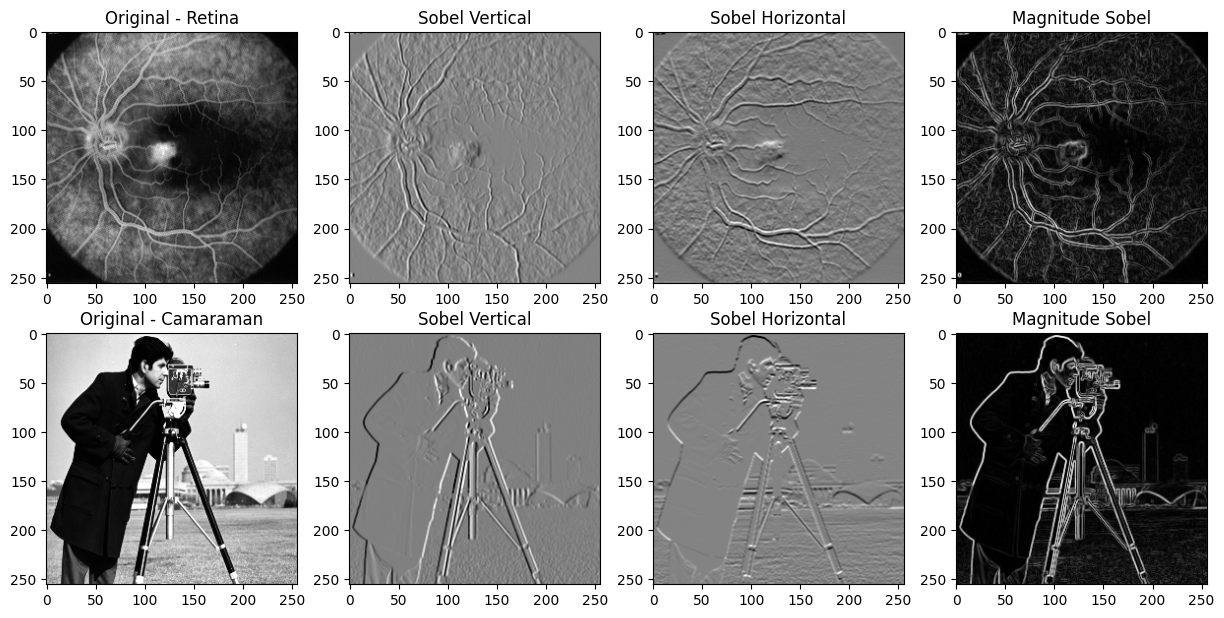

In [ ]:
# Chama a função para calcular a magnitude de Sobel e seus resultados parciais
ret_bordas, fv_ret, fh_ret  = magnitude_sobel(img1)           # imagem retina
man_bordas, fv_man, fh_man = magnitude_sobel(img2)            # imagem camaraman

# Plota a imagem original, a imagem com o filtro vertical e com o horizontal e a magnitude
lista_imagens = [img1, fv_ret, fh_ret, ret_bordas, img2, fv_man, fh_man, man_bordas]
titulos = ['Original - Retina', 'Sobel Vertical', 'Sobel Horizontal', 'Magnitude Sobel', 'Original - Camaraman', 'Sobel Vertical', 'Sobel Horizontal', 'Magnitude Sobel']
figura = plt.figure(figsize=(15,15))
for c in range(len(titulos)):
  a = figura.add_subplot(4,4,c+1)
  a.title.set_text(titulos[c])
  plt.imshow(lista_imagens[c], cmap='gray')
plt.show()

O resultado final é indicado pelas figuras da última coluna (Magnitude Sobel) que mostra a junção dos dois filtros (vertical e horizontal) em uma única imagem. Como é possível ver esse filtro destacou tantos os contornos verticais quanto os horizontais deixando as outras partes da imagem com menos destaque.